## ARMA Modeling: Unit Root Testing

**Functions**

`sm.tsa.stattools.adfuller`, `arch.unitroot.ADF` 

### Exercise 48
Download data on the AAA and BAA yields (Moodys) from FRED and construct the
default premium as the difference between these two.

1. Test the default premium for a unit root. 
2. If you find a unit root, test the change.

In [1]:
import pandas as pd
import pandas_datareader as pdr

# Conservative start date to get all data
aaa = pdr.get_data_fred("AAA", start="1950")
baa = pdr.get_data_fred("BAA", start="1950")

default = aaa["AAA"] - baa["BAA"]
default.name = "Default"

/home/kevin/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:18: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


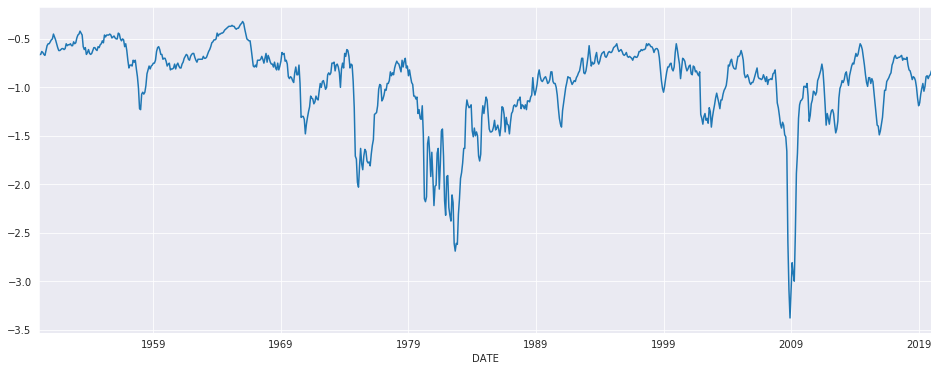

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16,6))

default.plot.line()

In [3]:
from arch.unitroot import ADF

adf = ADF(default, trend='ct')
adf.summary()

Test Statistic,-3.648
P-value,0.026
Lags,17


In [4]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     9.976
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           1.19e-26
Time:                        15:38:09   Log-Likelihood:                 771.70
No. Observations:                 823   AIC:                            -1503.
Df Residuals:                     803   BIC:                            -1409.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0350      0.010     -3.648      0.000      -0.054      -0.016
Diff.L1        0.3648      0.035     10.314      0.000       0.295       0.434
Diff.L2       -0.1073      0.037     -2.870      0.004      -0.181      -0.034
Diff.L3        0.0060      0.037      0.161      0.872      -0.068       0.080
Diff.L4        0.0078      0.037      0.207      0.836      -0.066       0.081
Diff.L5        0.1371      0.037      3.673      0.000       0.064       0.210
Diff.L6       -0.0602      0.038     -1.602      0.109      -0.134       0.014
Diff.L7       -0.0848      0.038     -2.256      0.024      -0.159      -0.011
Diff.L8       -0.0031      0.038     -0.083      0.934      -0.077       0.071
Diff.L9        0.0587      0.038      1.565      0.118      -0.015       0.132
Diff.L10      -0.0833      0.038     -2.219      0.027      -0.157      -0.010
Diff.L11       0.0650      0.037      1.736      0.083      -0.008       0.138
Diff.L12      -0.0385      0.037     -1.032      0.302      -0.112       0.035
Diff.L13      -0.0466      0.037     -1.254      0.210      -0.120       0.026
Diff.L14       0.0892      0.037      2.396      0.017       0.016       0.162
Diff.L15      -0.0397      0.037     -1.061      0.289      -0.113       0.034
Diff.L16      -0.0913      0.037     -2.464      0.014      -0.164      -0.019
Diff.L17       0.0542      0.035      1.534      0.125      -0.015       0.124
const         -0.0290      0.010     -2.920      0.004      -0.049      -0.010
trend      -1.214e-05   1.48e-05     -0.820      0.412   -4.12e-05    1.69e-05
==============================================================================
Omnibus:                      385.778   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9022.178
Skew:                          -1.583   Prob(JB):                         0.00
Kurtosis:                      18.908   Cond. No.                     8.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
adf = ADF(default, trend='c')
adf.summary()

Test Statistic,-3.569
P-value,0.006
Lags,17


In [6]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           4.88e-27
Time:                        15:38:09   Log-Likelihood:                 771.36
No. Observations:                 823   AIC:                            -1505.
Df Residuals:                     804   BIC:                            -1415.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0326      0.009     -3.569      0.000      -0.051      -0.015
Diff.L1        0.3632      0.035     10.286      0.000       0.294       0.432
Diff.L2       -0.1091      0.037     -2.924      0.004      -0.182      -0.036
Diff.L3        0.0044      0.037      0.118      0.906      -0.069       0.078
Diff.L4        0.0061      0.037      0.163      0.871      -0.067       0.079
Diff.L5        0.1355      0.037      3.636      0.000       0.062       0.209
Diff.L6       -0.0617      0.037     -1.647      0.100      -0.135       0.012
Diff.L7       -0.0863      0.038     -2.300      0.022      -0.160      -0.013
Diff.L8       -0.0045      0.037     -0.120      0.905      -0.078       0.069
Diff.L9        0.0573      0.037      1.530      0.126      -0.016       0.131
Diff.L10      -0.0847      0.038     -2.258      0.024      -0.158      -0.011
Diff.L11       0.0639      0.037      1.709      0.088      -0.009       0.137
Diff.L12      -0.0395      0.037     -1.060      0.290      -0.113       0.034
Diff.L13      -0.0478      0.037     -1.286      0.199      -0.121       0.025
Diff.L14       0.0881      0.037      2.368      0.018       0.015       0.161
Diff.L15      -0.0408      0.037     -1.094      0.274      -0.114       0.032
Diff.L16      -0.0922      0.037     -2.492      0.013      -0.165      -0.020
Diff.L17       0.0528      0.035      1.498      0.135      -0.016       0.122
const         -0.0317      0.009     -3.378      0.001      -0.050      -0.013
==============================================================================
Omnibus:                      385.536   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9121.922
Skew:                          -1.578   Prob(JB):                         0.00
Kurtosis:                      19.001   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 49

Download data on consumer prices in the UK from the ONS.

1. Test the log of CPI for a unit root. 
2. If you find a unit root, test inflation for one.

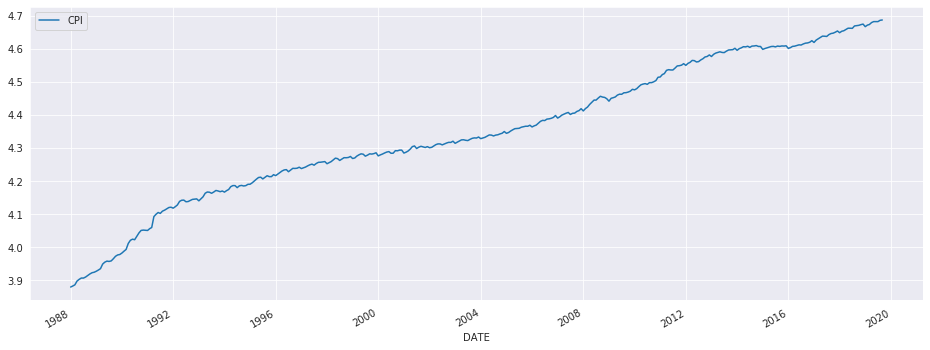

In [7]:
import numpy as np

cpi = pd.read_excel("data/uk-cpi-ons.xlsx", index_col="DATE")
lncpi = np.log(cpi)
plt.rc("figure", figsize=(16,6))
lncpi.plot.line()

In [8]:
adf = ADF(lncpi, trend="ct")
adf.summary()

Test Statistic,-3.972
P-value,0.010
Lags,14


In [9]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     35.38
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           3.66e-63
Time:                        15:38:10   Log-Likelihood:                 1668.8
No. Observations:                 366   AIC:                            -3304.
Df Residuals:                     349   BIC:                            -3237.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0200      0.005     -3.972      0.000      -0.030      -0.010
Diff.L1        0.0845      0.052      1.615      0.107      -0.018       0.187
Diff.L2        0.0731      0.052      1.406      0.161      -0.029       0.175
Diff.L3       -0.0121      0.037     -0.325      0.745      -0.085       0.061
Diff.L4       -0.0073      0.037     -0.196      0.845      -0.080       0.066
Diff.L5       -0.0623      0.037     -1.680      0.094      -0.135       0.011
Diff.L6        0.1141      0.037      3.063      0.002       0.041       0.187
Diff.L7        0.0251      0.038      0.666      0.506      -0.049       0.099
Diff.L8        0.0085      0.038      0.226      0.821      -0.066       0.083
Diff.L9       -0.0385      0.037     -1.030      0.304      -0.112       0.035
Diff.L10      -0.0200      0.037     -0.535      0.593      -0.093       0.054
Diff.L11       0.0230      0.037      0.614      0.539      -0.051       0.096
Diff.L12       0.6888      0.037     18.498      0.000       0.616       0.762
Diff.L13      -0.1277      0.052     -2.447      0.015      -0.230      -0.025
Diff.L14      -0.1137      0.052     -2.167      0.031      -0.217      -0.011
const          0.0819      0.020      4.009      0.000       0.042       0.122
trend       3.419e-05      9e-06      3.798      0.000    1.65e-05    5.19e-05
==============================================================================
Omnibus:                       93.523   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1069.844
Skew:                           0.695   Prob(JB):                    4.86e-233
Kurtosis:                      11.260   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
import statsmodels.tsa.api as tsa
with_trend = tsa.add_trend(lncpi, trend="ct")
with_trend.head()

,CPI,const,trend
DATE,,,
1988-01-01,3.879397,1.0,1.0
1988-02-01,3.882615,1.0,2.0
1988-03-01,3.886028,1.0,3.0
1988-04-01,3.897518,1.0,4.0
1988-05-01,3.902558,1.0,5.0


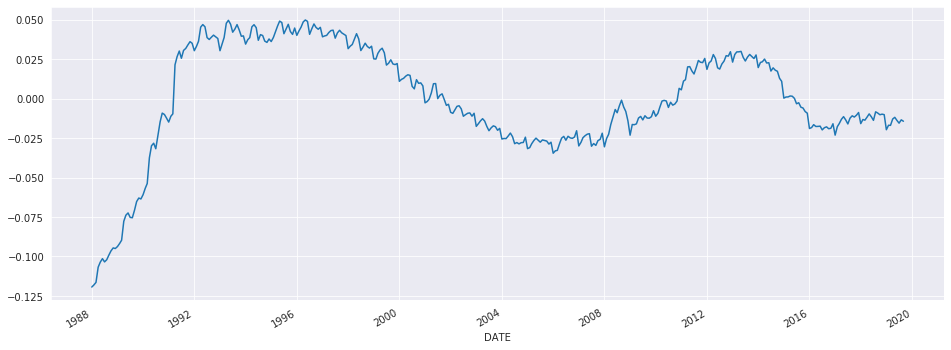

In [11]:
import statsmodels.api as sm
res = sm.OLS(with_trend["CPI"], with_trend[["const", "trend"]]).fit()

plt.rc("figure", figsize=(16,6))
res.resid.plot.line()